# OBJECTIVE

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [3]:
os.chdir(r'C:\Users\RAJAT SINGH\Downloads\Diwali sales')

In [4]:
df=pd.read_csv('Diwali Sales Data.csv', encoding='iso-8859-1')

## Data Cleaning and Preprocessing

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.shape

(11251, 15)

In [7]:
# finding the null values in our dataset
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [8]:
# removing the unecessary columns
df.drop(columns=['Status','unnamed1'], axis=1, inplace=True)

In [9]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [10]:
# finding the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [11]:
# dropping null values
df.dropna(inplace=True)

In [12]:
# changing the data type
df['Amount']=df['Amount'].astype('int')

In [13]:
# finding the null values
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [14]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [15]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratory Data Analysis

## Gender Distribution

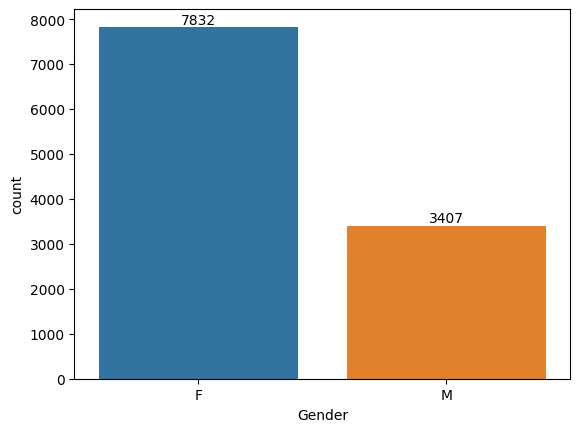

In [16]:
ax=sns.countplot(x='Gender', data=df)

for bars in ax.containers:
    ax.bar_label(bars)

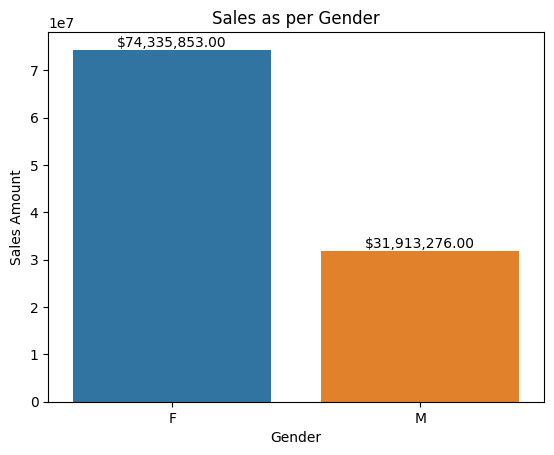

In [17]:
sales_gem=df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

ax=sns.barplot(x='Gender', y='Amount', data=sales_gem)

for i, v in enumerate(sales_gem['Amount']):
    ax.text(i, v, "${:,.2f}".format(v), ha='center', va='bottom')

ax.set_ylabel('Sales Amount')
ax.set_title('Sales as per Gender')

plt.show()

## Age

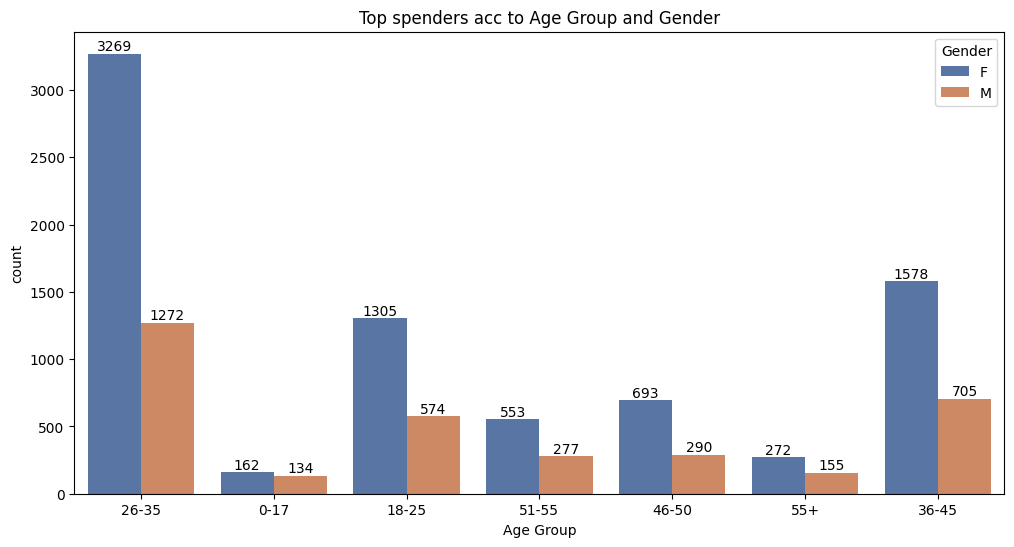

In [18]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x='Age Group', data=df, hue='Gender', color='blue', palette='deep')
plt.title('Top spenders acc to Age Group and Gender')

for bars in ax.containers:
    ax.bar_label(bars)

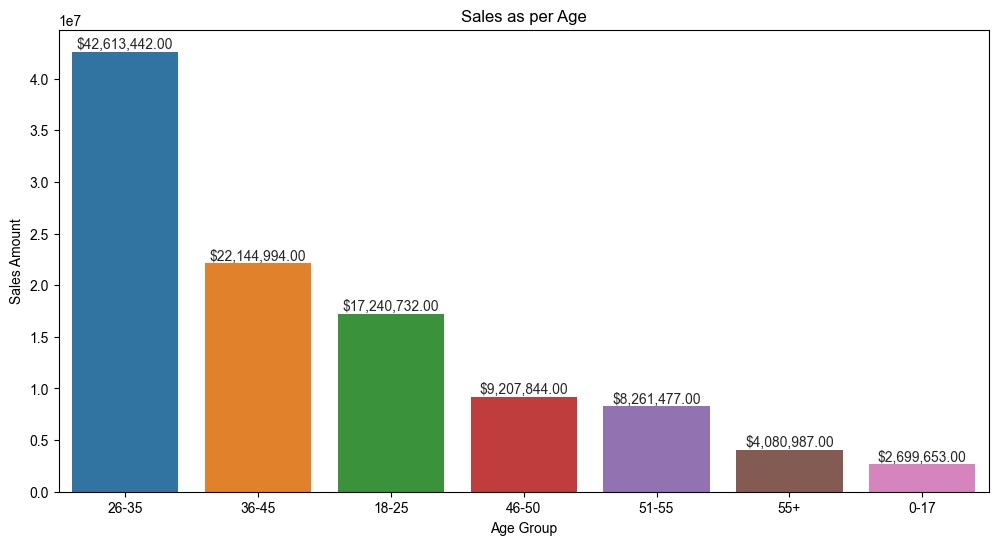

In [19]:
plt.figure(figsize=(12,6))
sales_age=df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

ax=sns.barplot(x='Age Group', y='Amount', data=sales_age)
sns.set_style('darkgrid')

for i, v in enumerate(sales_age['Amount']):
    ax.text(i, v, "${:,.2f}".format(v), ha='center', va='bottom')

ax.set_ylabel('Sales Amount')
ax.set_title('Sales as per Age')

plt.show()

## State

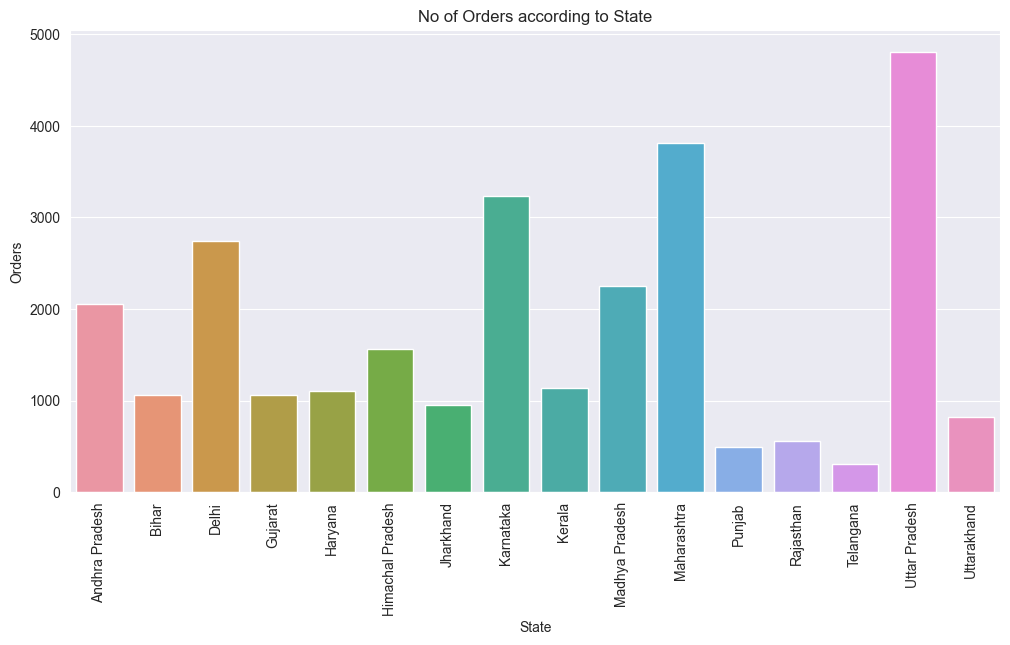

In [20]:
plt.figure(figsize=(12,6))
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum()
sales_state.sort_values(by='Orders',ascending=True)
sns.barplot(data = sales_state, x = 'State',y= 'Orders')
plt.xticks(rotation='vertical')
plt.title('No of Orders according to State')
plt.show()

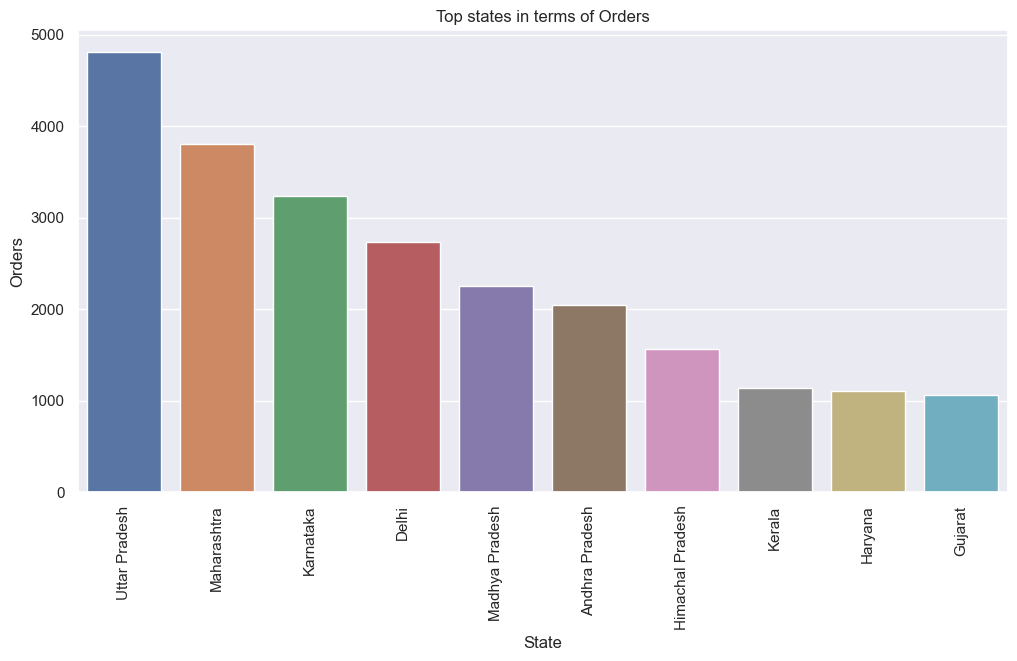

In [21]:
# total no of orders from top 10 highest states
orders_state=df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(12,6)})
sns.barplot(data=orders_state, x='State', y='Orders')
plt.xticks(rotation='vertical')
plt.title('Top states in terms of Orders')
plt.show()

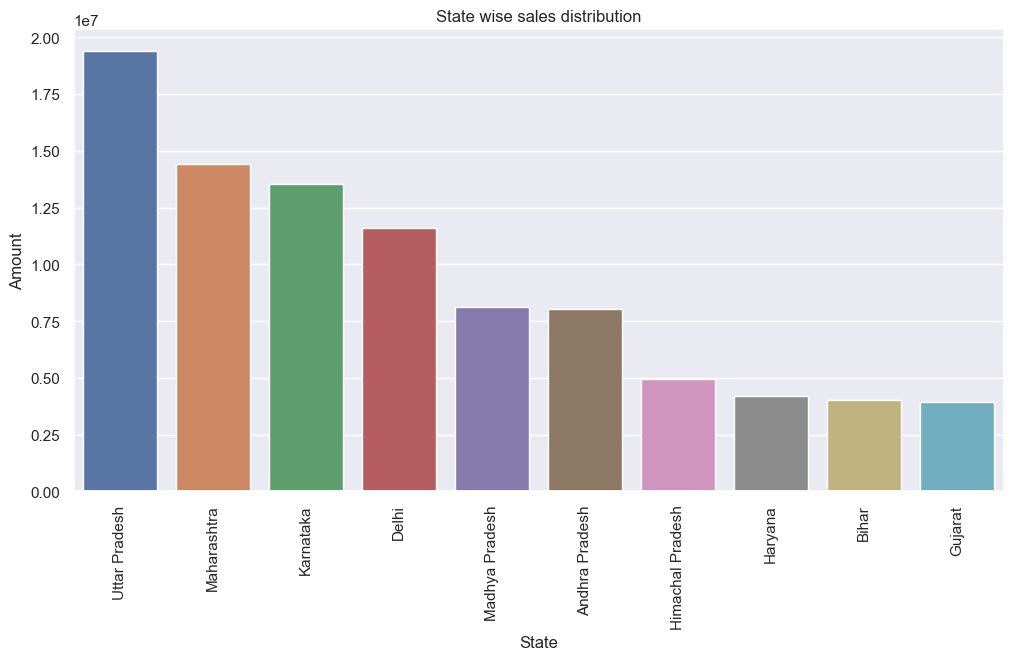

In [22]:
# total amount sales from top 10 states
sales_state=df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(12,6)})
sns.barplot(data=sales_state, x='State', y='Amount')
plt.xticks(rotation='vertical')
plt.title('State wise sales distribution')

plt.show()

## Marital Status

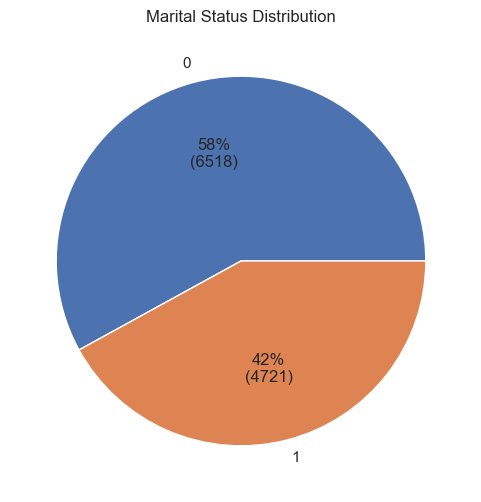

In [23]:
status_counts = df['Marital_Status'].value_counts()

plt.figure(figsize=(6, 6))

_, _, autotexts = plt.pie(status_counts, labels=status_counts.index, autopct=lambda p: f'{p:.0f}%\n({p/100*len(df):.0f})')

plt.title('Marital Status Distribution')

for i, autotext in enumerate(autotexts):
    count = status_counts[i]
    percentage = count / len(df) * 100
    autotext.set_text(f'{percentage:.0f}%\n({count:.0f})')
    
plt.show()

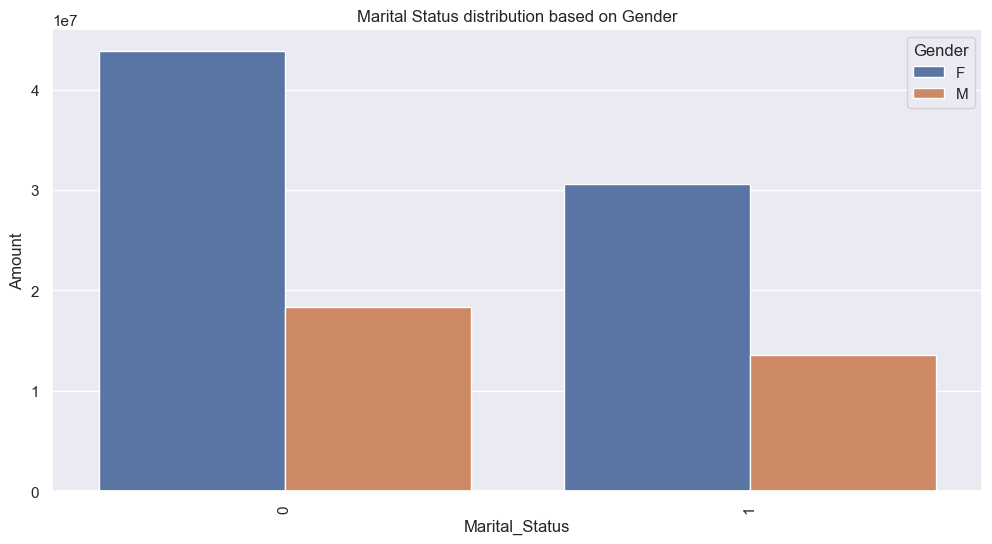

In [24]:
sales_state=df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(12,6)})
sns.barplot(data=sales_state, x='Marital_Status', y='Amount', hue='Gender')
plt.title('Marital Status distribution based on Gender')
plt.xticks(rotation='vertical')

plt.show()

## Occupation

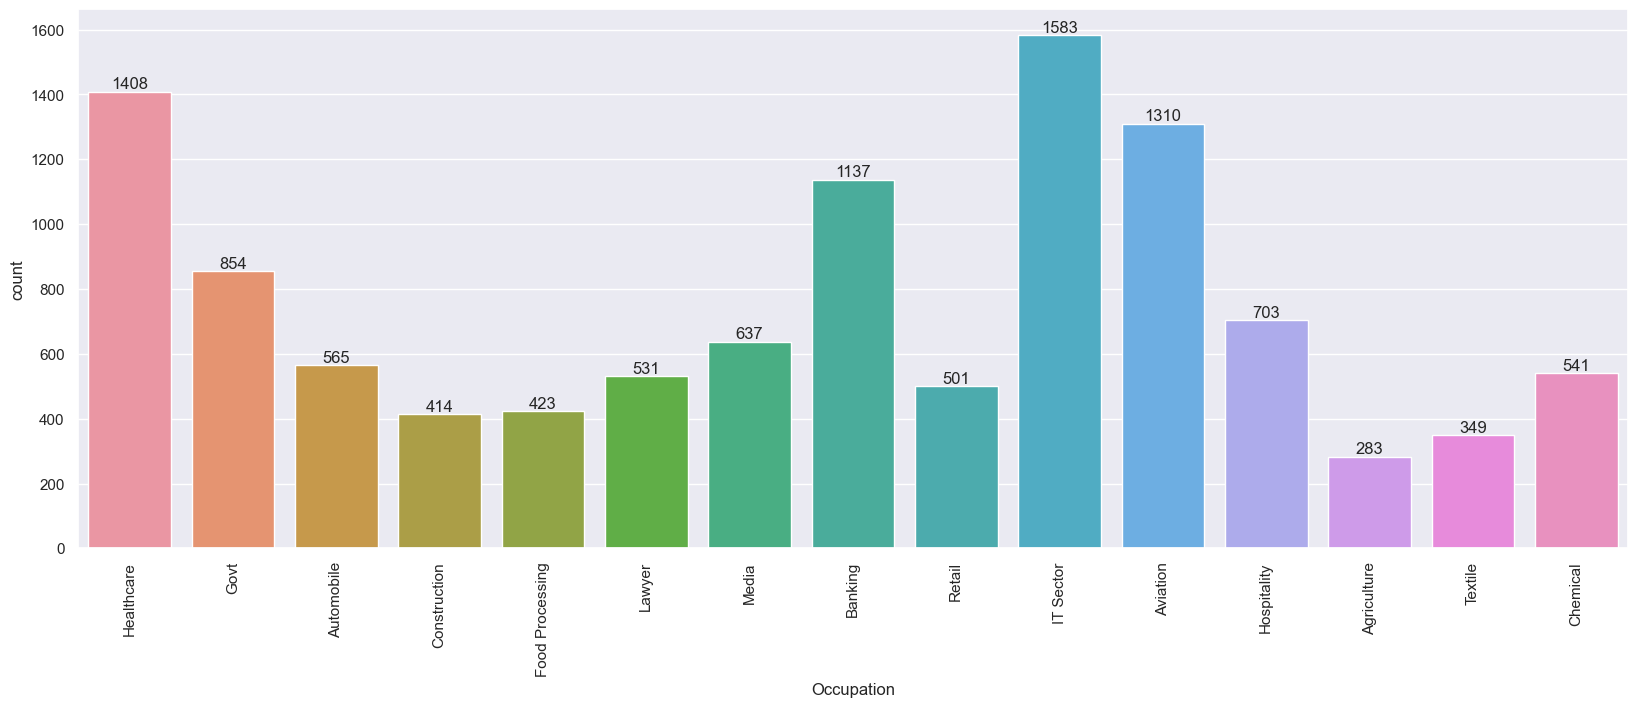

In [25]:
sns.set(rc={'figure.figsize': (20,7)})
ax=sns.countplot(x='Occupation', data=df)
plt.xticks(rotation='vertical')

for bars in ax.containers:
    ax.bar_label(bars)

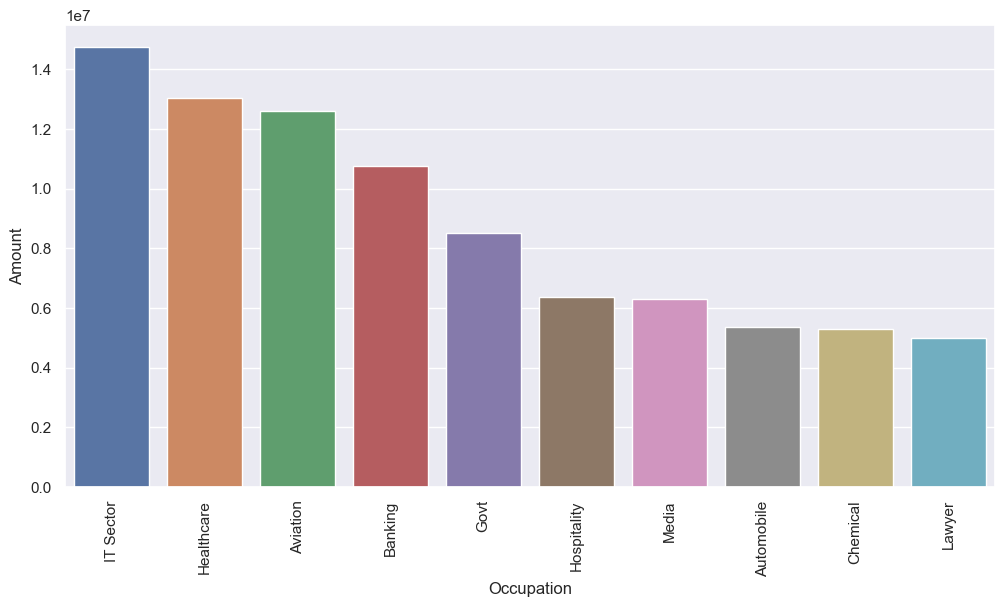

In [26]:
sales_occupation=df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(12,6)})
sns.barplot(data=sales_occupation, x='Occupation', y='Amount')
plt.xticks(rotation='vertical')

plt.show()

## Product Category

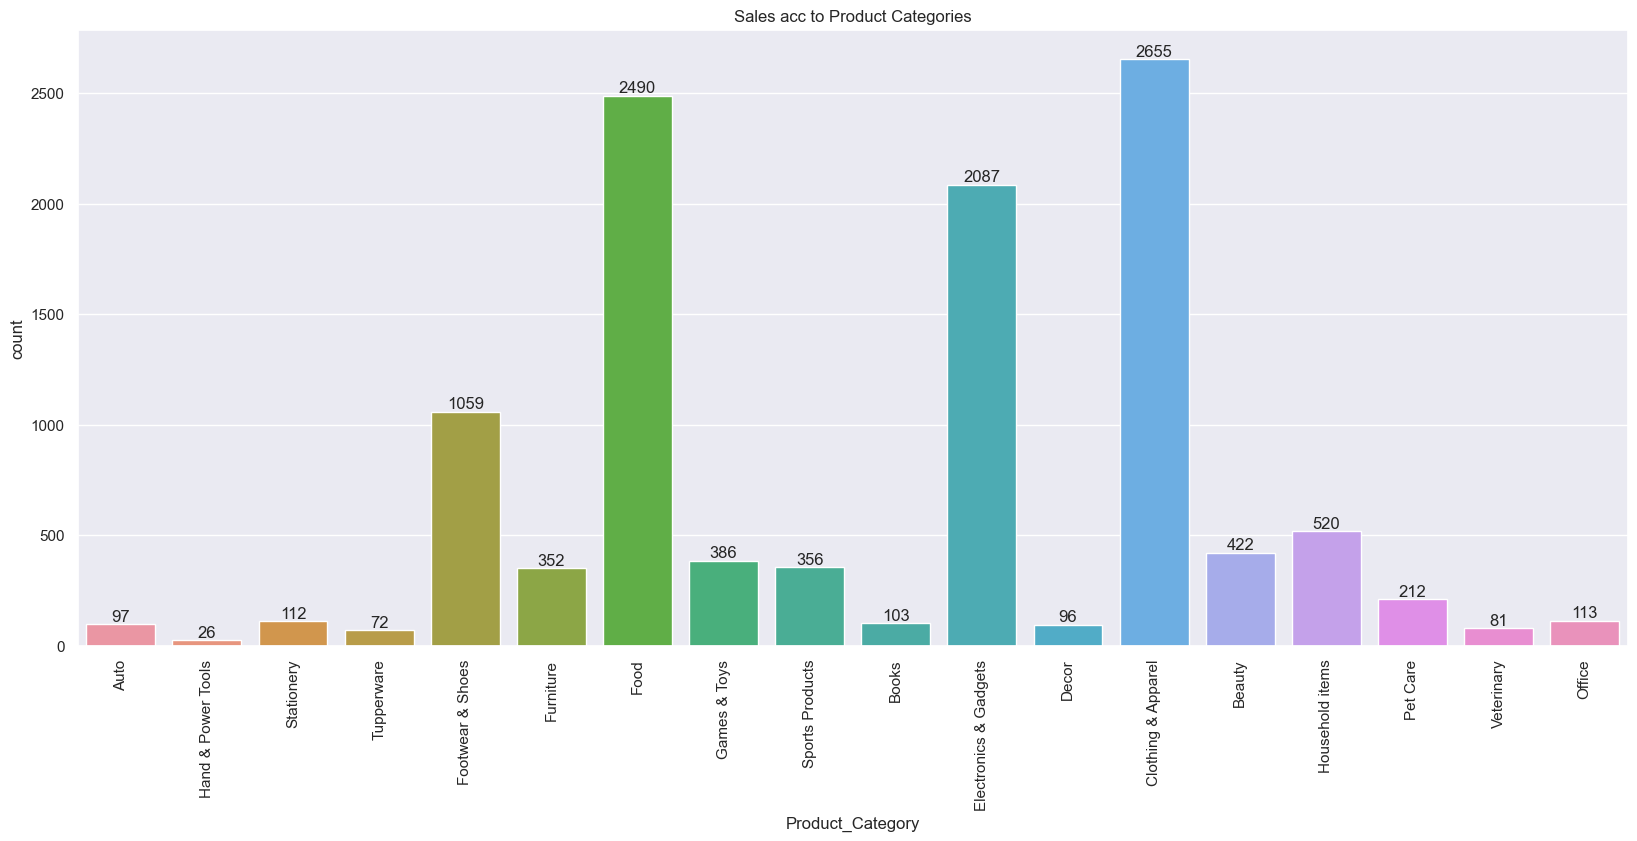

In [27]:
sns.set(rc={'figure.figsize': (20,8)})
ax=sns.countplot(x='Product_Category', data=df)
plt.xticks(rotation='vertical')
plt.title('Sales acc to Product Categories')

for bars in ax.containers:
    ax.bar_label(bars)

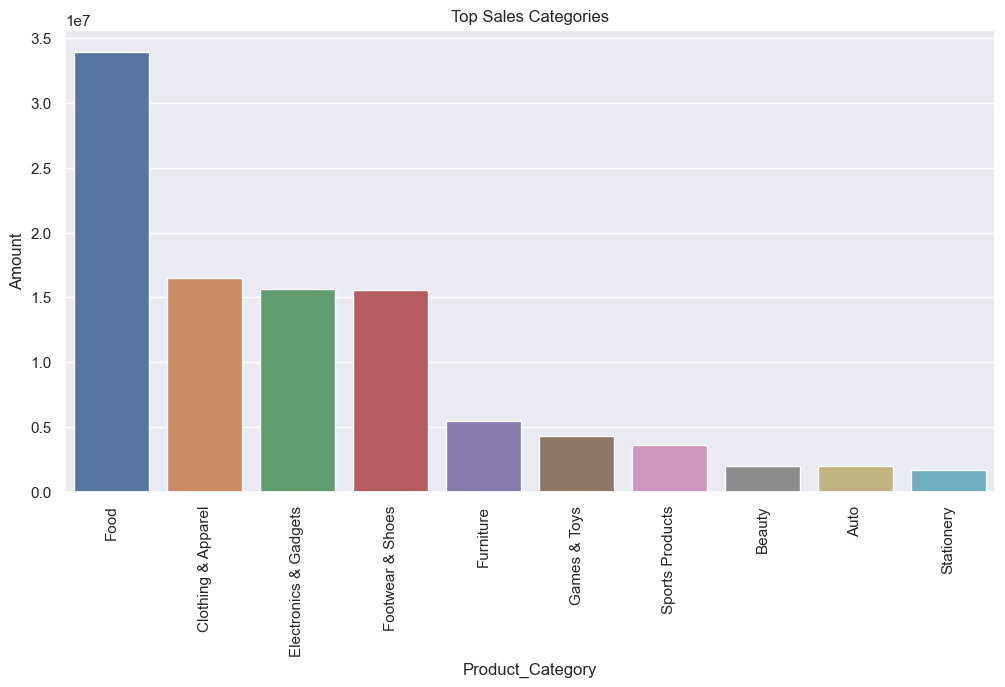

In [28]:
sales_occupation=df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(12,6)})
sns.barplot(data=sales_occupation, x='Product_Category', y='Amount')
plt.xticks(rotation='vertical')
plt.title('Top Sales Categories')

plt.show()

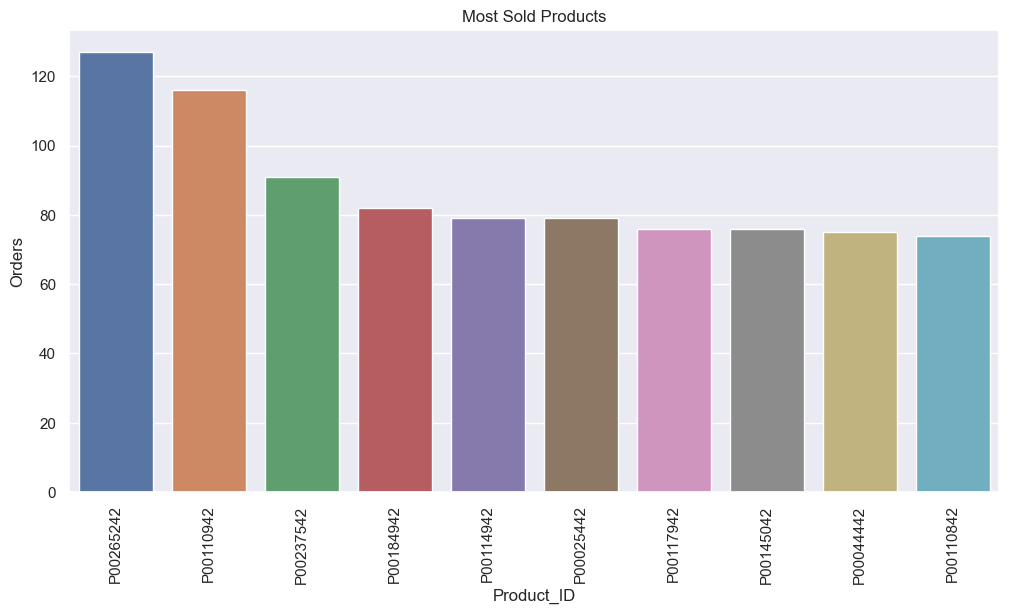

In [29]:
# Finding most sold products in respect to there product_id
sales_occupation=df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(12,6)})
sns.barplot(data=sales_occupation, x='Product_ID', y='Orders')
plt.xticks(rotation='vertical')
plt.title('Most Sold Products')

plt.show()

# Conclusion